In [59]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Gather Data
In the following lines of code, I will gather the nedded data to start working on assesting and cleaning the data.

### 1. Read Twitter archive enhanced data into a pandas data frame.


In [19]:
df = pd.read_csv('twitter-archive-enhanced.csv')

### 2. Gather more information about the data we currently have. 
That includes gathering number of likes and retweets as they are missing from the original data we have.
We will use tweet_id to contact Twitter API asking for details about this particular tweet.

In [20]:
auth = tweepy.OAuthHandler('4r9FThwMP0veULbw4abyVPI46', 'FbmHz8iVcDkyC97ID6z2gQ6z94fCjKVZL5DlJeyqjg05jxmGPz')
auth.set_access_token('153918738-p1TSoqTSUv753TSHeKP9XTPPoOL2cxwq04tWJ1f6', 'u9QYmIS5zafFL31BDxUIMTU8S6gRDQ7LLmSlF9UvGwnL2')
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
all_tweets = []
inValid_tweets = []

In [ ]:
for tweet_id in df['tweet_id']:
    try:
        #tweet = api.get_status(tweet_id,tweet_mode='extended')
        tweet = api.get_status(tweet_id)
        all_tweets.append(tweet._json)
    except tweepy.TweepError:
        inValid_tweets.append(tweet_id)


In [ ]:
print ("Number of invalid tweet id is: ", len(inValid_tweets))
print ("Number of valid tweet id is: ", len(all_tweets))


### 3. Store tweets full data into a txt file.
This step will help us in the future to be able to retrieve any specific data for a particular tweet. Instead of asking Twitter API to get them again.

In [ ]:
with open('tweet_json2.txt', 'w') as f:
    json.dump(all_tweets, f,indent=2)

### 4. Get number of likes and retweets for all tweets we have, store them into a pandas data frame.

In [21]:
likes_retweets = pd.read_json('tweet_json.txt')
likes_retweets = likes_retweets[['id','favorite_count','retweet_count']]

### 5. Gather image predictions data about dogs 'programmatically'

In [22]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)


In [23]:
with open('image_predictions.tsv', mode='wb') as out_file:
    out_file.write(response.content)

In [32]:
predictions = pd.read_csv('image_predictions.tsv',sep='\t')

# Assess

In [33]:
df.head() # Enhanced twitter archived data


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
likes_retweets.head() # Number of likes and retweets for each tweet in the df

,id,favorite_count,retweet_count
0,892420643555336193,38525,8499
1,892177421306343426,33031,6247
2,891815181378084864,24863,4139
3,891689557279858688,41923,8616
4,891327558926688256,40069,9354


In [35]:
predictions.head() # prediction about dogs images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you keepin the popcorn bucket in your lap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693622659...,10,10,None,None,None,None,None
1130,729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,10,None,None,None,None,None
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None
1332,705475953783398401,NaN,NaN,2016-03-03 19:32:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Zara. She found a sandal and coul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705475953...,12,10,Zara,None,None,None,None
853,765371061932261376,NaN,NaN,2016-08-16 02:14:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765371061...,11,10,Louie,None,None,pupper,None


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [40]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [41]:
all_columns = pd.Series(list(df) + list(likes_retweets) + list(predictions))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

## Quality

- make the source as a string categorical variable
- add new column dog gender
- remove invalid tweets_id from enhanced archived data
- change this columns type (tweet_id) to string because We don't want any operations on it
- drop data about retweets (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)
- remove hour:min:seconds and +0000 from timestamp
- deivide the date into two columns year, month.
- manibulate name column (None names and wrong names)
- The numerator and denominator columns have invalid values
- tweet_id '810984652412424192'doesn't have a valid rating
- Missing values from prediction images dataset (2075 rows instead of 2356)
- We only want ratings with images. Not all ratings have images.
- retweet and favorite counts to be integer instead of float


## Tidness
- join likes and retweets columns to the same archived data set.
- melt dog type 4 columns into one category column
- rating_numerator and denominator should be one variable rating.
- merge prediction table with enhanced archived data (All tables should be part of one dataset)

## Clean / Quality 

In [42]:
df_clean = df.copy() # Enhanced twitter archived data
likes_retweets_clean = likes_retweets.copy() # Number of likes and retweets for each tweet in the df
predictions_clean = predictions.copy() # prediction about dogs images

##### Define
make source column categorized by source type - extract device name

##### Code

In [43]:
def categorizeSource (x):
    return {
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
        '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
        '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
        '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'
    } [x]

In [44]:
df_clean.source = df_clean.source.apply(categorizeSource)


##### Test

In [45]:
df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

##### Define
- add new column dog_gender
##### Code

In [46]:
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_clean['text']:
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    else:
        dog_gender.append(np.nan)



In [47]:
df_clean['gender'] = dog_gender

##### Test

In [48]:
df_clean.gender.value_counts()

male      716
female    259
Name: gender, dtype: int64

##### Define
- remove invalid tweets_id from enhanced archived data
##### Code

In [49]:
df_clean = df_clean[df_clean.tweet_id != 888202515573088257]
df_clean = df_clean[df_clean.tweet_id != 873697596434513921]
df_clean = df_clean[df_clean.tweet_id != 869988702071779329]
df_clean = df_clean[df_clean.tweet_id != 866816280283807744]
df_clean = df_clean[df_clean.tweet_id != 861769973181624320]
df_clean = df_clean[df_clean.tweet_id != 845459076796616705]
df_clean = df_clean[df_clean.tweet_id != 842892208864923648]
df_clean = df_clean[df_clean.tweet_id != 837012587749474308]
df_clean = df_clean[df_clean.tweet_id != 827228250799742977]
df_clean = df_clean[df_clean.tweet_id != 802247111496568832]
df_clean = df_clean[df_clean.tweet_id != 775096608509886464]
df_clean = df_clean[df_clean.tweet_id != 771004394259247104]
df_clean = df_clean[df_clean.tweet_id != 770743923962707968]
df_clean = df_clean[df_clean.tweet_id != 754011816964026368]
df_clean = df_clean[df_clean.tweet_id != 810984652412424192]
df_clean = df_clean[df_clean.tweet_id != 838150277551247360]
df_clean = df_clean[df_clean.tweet_id != 749981277374128128]

##### Test

In [50]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,gender
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,female
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,male
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,female
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,male


##### Define
- tweet_id should be string not int

##### Code

In [51]:
df_clean['tweet_id'] = df_clean['tweet_id'].apply(str)

##### Test

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2339 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2339 non-null object
source                        2339 non-null object
text                          2339 non-null object
retweeted_status_id           168 non-null float64
retweeted_status_user_id      168 non-null float64
retweeted_status_timestamp    168 non-null object
expanded_urls                 2281 non-null object
rating_numerator              2339 non-null int64
rating_denominator            2339 non-null int64
name                          2339 non-null object
doggo                         2339 non-null object
floofer                       2339 non-null object
pupper                        2339 non-null object
puppo                         2339 non-null object
gender                        9

##### Define
- drop columns about retweets (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)
- delete retweets raws
##### Code

In [53]:
df_clean=df_clean[df_clean.retweeted_status_id.isnull()]

In [54]:
df_clean = df_clean.drop('retweeted_status_id', 1)
df_clean = df_clean.drop('retweeted_status_user_id', 1)
df_clean = df_clean.drop('retweeted_status_timestamp', 1)
df_clean = df_clean.drop('in_reply_to_status_id', 1)
df_clean = df_clean.drop('in_reply_to_user_id', 1)

##### Test

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2171 non-null object
timestamp             2171 non-null object
source                2171 non-null object
text                  2171 non-null object
expanded_urls         2114 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
doggo                 2171 non-null object
floofer               2171 non-null object
pupper                2171 non-null object
puppo                 2171 non-null object
gender                899 non-null object
dtypes: int64(2), object(11)
memory usage: 237.5+ KB


##### Define
remove hour:min:seconds and +0000 from timestamp

##### Code

In [56]:
df_clean.timestamp = df_clean.timestamp.str.slice(0,10)

##### Test

In [57]:
df_clean.timestamp.sample()

1625    2016-01-06
Name: timestamp, dtype: object

##### Define
manibulate name column (None names and wrong names)

##### Code

In [60]:
dog_names = []

for text in df_clean['text']:
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        dog_names.append('NaN')

In [61]:
df_clean['dog_name'] = dog_names

In [63]:
df_clean = df_clean.drop(['name'], 1)


##### Test

In [65]:
df_clean['dog_name'].value_counts()

NaN          764
Lucy          11
Cooper        10
Charlie       10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           8
Daisy          7
Stanley        6
Bella          6
Oscar          6
Bo             6
Bailey         6
Koda           6
Jax            6
Toby           6
Buddy          5
Rusty          5
Scout          5
Leo            5
Chester        5
Bentley        5
Milo           5
Louis          5
Finn           4
Dexter         4
Winnie         4
            ... 
Bluebert       1
Milky          1
Wiggles        1
Noosh          1
Maya           1
Shiloh         1
Brandy         1
Carly          1
Nollie         1
Rodman         1
Barclay        1
Caryl          1
Joshwa         1
Charl          1
Bubba          1
Chesney        1
Rolf           1
Lance          1
Ralphus        1
Emma           1
Bodie          1
Jameson        1
Klein          1
Franq          1
Shnuggles      1
Crawford       1
Hermione       1
Traviss       

##### Define

The numerator and denominator columns have invalid values
##### Code

In [66]:
pd.set_option('display.max_colwidth', -1)
df_clean.loc[df_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [67]:
df_clean.loc[df_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df_clean.loc[df_clean.tweet_id=='835246439529840640',['rating_numerator','rating_denominator']]=[13,10]
df_clean.loc[df_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df_clean.loc[df_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df_clean.loc[df_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]

In [68]:
df_clean['rating']=df_clean.rating_numerator/df_clean.rating_denominator
df_clean=df_clean.drop(['rating_numerator','rating_denominator'],axis=1)

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2171 non-null object
timestamp        2171 non-null object
source           2171 non-null object
text             2171 non-null object
expanded_urls    2114 non-null object
doggo            2171 non-null object
floofer          2171 non-null object
pupper           2171 non-null object
puppo            2171 non-null object
gender           899 non-null object
dog_name         2171 non-null object
rating           2171 non-null float64
dtypes: float64(1), object(11)
memory usage: 220.5+ KB


In [70]:
df_clean.loc[df_clean.tweet_id=="855862651834028034","rating"] = 0.4
df_clean.loc[df_clean.tweet_id=="855860136149123072","rating"] = 0.6
df_clean.loc[df_clean.tweet_id=="832215909146226688","rating"] = 1.0
df_clean.loc[df_clean.tweet_id=="786709082849828864","rating"] = 1.0
df_clean.loc[df_clean.tweet_id=="778027034220126208","rating"] = 1.1
df_clean.loc[df_clean.tweet_id=="680494726643068929","rating"] = 1.1
df_clean.loc[df_clean.tweet_id=="670842764863651840","rating"] = 0.4

##### Test


In [71]:
df_clean.rating.sort_values()


1016    0.0
315     0.0
2091    0.1
1446    0.1
2038    0.1
1869    0.1
1940    0.1
2261    0.1
2338    0.1
1598    0.2
2310    0.2
1764    0.2
2326    0.2
1761    0.2
1920    0.2
2237    0.2
2246    0.2
1165    0.2
2079    0.2
2349    0.2
2183    0.3
1692    0.3
2305    0.3
1249    0.3
2202    0.3
1478    0.3
1314    0.3
1601    0.3
1898    0.3
1189    0.3
       ... 
426     1.4
404     1.4
395     1.4
372     1.4
369     1.4
347     1.4
339     1.4
268     1.4
418     1.4
1068    1.4
184     1.4
164     1.4
56      1.4
64      1.4
76      1.4
924     1.4
83      1.4
866     1.4
490     1.4
788     1.4
110     1.4
117     1.4
123     1.4
657     1.4
141     1.4
631     1.4
149     1.4
758     1.4
291     1.5
55      1.7
Name: rating, Length: 2171, dtype: float64

##### Test

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2171 non-null object
timestamp        2171 non-null object
source           2171 non-null object
text             2171 non-null object
expanded_urls    2114 non-null object
doggo            2171 non-null object
floofer          2171 non-null object
pupper           2171 non-null object
puppo            2171 non-null object
gender           899 non-null object
dog_name         2171 non-null object
rating           2171 non-null float64
dtypes: float64(1), object(11)
memory usage: 220.5+ KB


##### Define
- merge likes and retweets columns to the same archived data set.
##### Code

In [73]:
likes_retweets_clean['tweet_id'] = likes_retweets_clean.id.apply(str)
df_clean=pd.merge(df_clean,likes_retweets_clean,on='tweet_id',how='left')

- keep only tweets that have image in predection data frame.

In [74]:
predictions_clean.tweet_id=predictions_clean.tweet_id.astype(str)
image_id=predictions_clean[['tweet_id']]
df_clean=pd.merge(df_clean,image_id,on='tweet_id')

##### Test

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 15 columns):
tweet_id          1991 non-null object
timestamp         1991 non-null object
source            1991 non-null object
text              1991 non-null object
expanded_urls     1991 non-null object
doggo             1991 non-null object
floofer           1991 non-null object
pupper            1991 non-null object
puppo             1991 non-null object
gender            860 non-null object
dog_name          1991 non-null object
rating            1991 non-null float64
id                1990 non-null float64
favorite_count    1990 non-null float64
retweet_count     1990 non-null float64
dtypes: float64(4), object(11)
memory usage: 248.9+ KB


### Gather
- one row is missing for favorite and retweets count
##### Code

In [76]:
missing_tweet=df_clean.tweet_id[df_clean.retweet_count.isnull()]
tweet = api.get_status('760539183865880579')

In [77]:
df_clean.loc[df_clean.tweet_id==missing_tweet.iloc[0],['retweet_count','favorite_count']]=[tweet.retweet_count,tweet.favorite_count]

##### Test

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 15 columns):
tweet_id          1991 non-null object
timestamp         1991 non-null object
source            1991 non-null object
text              1991 non-null object
expanded_urls     1991 non-null object
doggo             1991 non-null object
floofer           1991 non-null object
pupper            1991 non-null object
puppo             1991 non-null object
gender            860 non-null object
dog_name          1991 non-null object
rating            1991 non-null float64
id                1990 non-null float64
favorite_count    1991 non-null float64
retweet_count     1991 non-null float64
dtypes: float64(4), object(11)
memory usage: 248.9+ KB


##### Define
- deivide the date into two columns year, month.
##### Code

In [79]:
year = df_clean.timestamp.str.slice(0,4)
month = df_clean.timestamp.str.slice(5,7)
day = df_clean.timestamp.str.slice(8,10)

In [80]:
df_clean['tweet_year'] = year
df_clean['tweet_month'] = month
df_clean['tweet_day'] = day


In [81]:
df_clean = df_clean.drop('timestamp',axis=1)

In [82]:
day.count()

1991

In [83]:
def categorizeMonth (x):
    return {
        '01':'January',
        '02':'February',
        '03':'March',
        '04':'April',
        '05':'May',
        '06':'June',
        '07':'July',
        '08':'August',
        '09':'September',
        '10':'October',
        '11':'Nobember',
        '12':'December'
    } [x]

In [84]:
df_clean['tweet_month'] = df_clean['tweet_month'].apply(categorizeMonth)

##### Test

In [85]:
df_clean.sample(20)

,tweet_id,source,text,expanded_urls,doggo,floofer,pupper,puppo,gender,dog_name,rating,id,favorite_count,retweet_count,tweet_year,tweet_month,tweet_day
492,788765914992902144,Twitter for iPhone,This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,https://twitter.com/dog_rates/status/788765914992902144/photo/1,None,None,None,None,female,Butter,1.2,7.887659e+17,29782.0,11516.0,2016,October,19
159,852672615818899456,Twitter for iPhone,This is Aspen. She's never tasted a stick so succulent. On the verge of tears. A face of pure appreciation. 12/10 https://t.co/VlyBzOXHEW,https://twitter.com/dog_rates/status/852672615818899456/photo/1,None,None,None,None,NaN,Aspen,1.2,8.526726e+17,15478.0,2285.0,2017,April,13
1741,670704688707301377,Twitter for iPhone,Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible https://t.co/I1lMUy1FqH,https://twitter.com/dog_rates/status/670704688707301377/photo/1,None,None,None,None,male,Danny,0.6,6.707047e+17,786.0,387.0,2015,Nobember,28
116,863907417377173506,Twitter for iPhone,This is Albus. He's quite impressive at hide and seek. Knows he's been found this time. 13/10 usually elusive as h*ck https://t.co/ht47njyZ64,"https://twitter.com/dog_rates/status/863907417377173506/photo/1,https://twitter.com/dog_rates/status/863907417377173506/photo/1",None,None,None,None,male,Albus,1.3,8.639074e+17,20900.0,4255.0,2017,May,15
826,735648611367784448,Twitter for iPhone,*faints* 12/10 perfection in pupper form https://t.co/t6TxTwTLEK,https://twitter.com/dog_rates/status/735648611367784448/photo/1,None,None,pupper,None,NaN,NaN,1.2,7.356486e+17,4258.0,1189.0,2016,May,26
437,798209839306514432,Twitter for iPhone,This is Cooper. His bow tie was too heavy for the front so he moved it to the side. Balanced af now. 13/10 https://t.co/jG1PAFkB81,https://twitter.com/dog_rates/status/798209839306514432/photo/1,None,None,None,None,male,Cooper,1.3,7.982098e+17,11277.0,2852.0,2016,Nobember,14
1484,676098748976615425,Twitter for iPhone,Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb,https://twitter.com/dog_rates/status/676098748976615425/photo/1,None,None,None,None,NaN,NaN,0.3,6.760987e+17,3163.0,1545.0,2015,December,13
31,885528943205470208,Twitter for iPhone,This is Maisey. She fell asleep mid-excavation. Happens to the best of us. 13/10 would pat noggin approvingly https://t.co/tp1kQ8i9JF,https://twitter.com/dog_rates/status/885528943205470208/photo/1,None,None,None,None,female,Maisey,1.3,8.855289e+17,35751.0,6410.0,2017,July,13
1955,666437273139982337,Twitter for iPhone,Here we see a lone northeastern Cumberbatch. Half ladybug. Only builds with bricks. Very confident with body. 7/10 https://t.co/7LtjBS0GPK,https://twitter.com/dog_rates/status/666437273139982337/photo/1,None,None,None,None,NaN,NaN,0.7,6.664373e+17,125.0,48.0,2015,Nobember,17
75,874680097055178752,Twitter for iPhone,Meet Cash. He hath acquired a stick. A very good stick tbh. 12/10 would pat head approvingly https://t.co/lZhtizkURD,https://twitter.com/dog_rates/status/874680097055178752/photo/1,None,None,None,None,male,Cash,1.2,8.746801e+17,27718.0,4665.0,2017,June,13


##### Define
- melt 4 dog stages into one column 'dog_stage'
##### Code

In [86]:
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in df_clean.columns.tolist() if x not in columns_to_melt]

df_clean = pd.melt(df_clean, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

df_clean = df_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')


df_clean = df_clean.drop('stages', 1)


In [87]:
df_clean.dog_stage=df_clean.dog_stage.replace('None',np.nan)

##### Test

In [88]:
df_clean.dog_stage.value_counts()


pupper     212
doggo      63 
puppo      23 
floofer    8  
Name: dog_stage, dtype: int64

##### Define
- retweet and favorite to be int not float
- remove id column (int)
##### Code

In [89]:
df_clean.favorite_count = df_clean.favorite_count.fillna(0.0).astype(int)
df_clean.retweet_count = df_clean.retweet_count.fillna(0.0).astype(int)
df_clean = df_clean.drop('id',1)


#### save at this point the df_clean into a local csv file

In [90]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

In [91]:
df_clean['dog_stage'] = df_clean['dog_stage'].astype('category')


### Final data set structure 

In [92]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 1915 to 6282
Data columns (total 13 columns):
tweet_id          1991 non-null object
source            1991 non-null object
text              1991 non-null object
expanded_urls     1991 non-null object
gender            860 non-null object
dog_name          1991 non-null object
rating            1991 non-null float64
favorite_count    1991 non-null int64
retweet_count     1991 non-null int64
tweet_year        1991 non-null object
tweet_month       1991 non-null object
tweet_day         1991 non-null object
dog_stage         306 non-null category
dtypes: category(1), float64(1), int64(2), object(9)
memory usage: 204.3+ KB


In [93]:
df_clean.describe()

,rating,favorite_count,retweet_count
count,1991.000000,1991.000000,1991.000000
mean,1.054495,8815.174787,2697.125565
std,0.219063,12655.468935,4718.814923
min,0.000000,80.000000,12.000000
25%,1.000000,1902.000000,601.000000
50%,1.100000,4001.000000,1296.000000
75%,1.200000,11063.500000,3101.000000
max,1.400000,142312.000000,76674.000000


## More visualizations

In [94]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 1915 to 6282
Data columns (total 13 columns):
tweet_id          1991 non-null object
source            1991 non-null object
text              1991 non-null object
expanded_urls     1991 non-null object
gender            860 non-null object
dog_name          1991 non-null object
rating            1991 non-null float64
favorite_count    1991 non-null int64
retweet_count     1991 non-null int64
tweet_year        1991 non-null object
tweet_month       1991 non-null object
tweet_day         1991 non-null object
dog_stage         306 non-null category
dtypes: category(1), float64(1), int64(2), object(9)
memory usage: 204.3+ KB


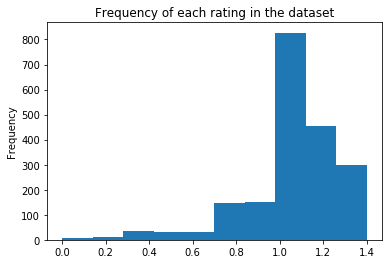

In [97]:
rating_histogram = df_clean['rating'].plot.hist(title='Frequency of each rating in the dataset')


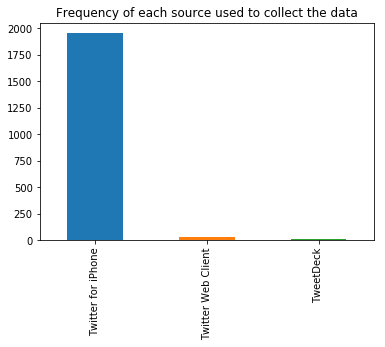

In [99]:
df_clean['source'].value_counts().plot(kind='bar',title='Frequency of each source used to collect the data')

In [100]:
df_clean['source'].value_counts()

Twitter for iPhone    1953
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

Text(0.5,0,'Dog Stages')

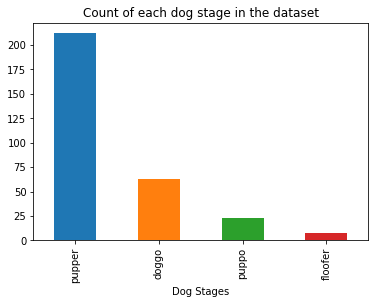

In [130]:
df_clean['dog_stage'].value_counts().plot(kind='bar',title='Count of each dog stage in the dataset').set_xlabel("Dog Stages")

Text(0.5,1,'Count of retweets count for each dog stage')

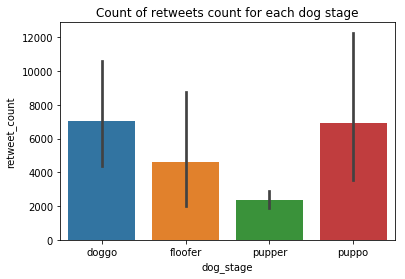

In [109]:
sns.barplot(x='dog_stage',y='retweet_count',data=df_clean).set_title('Count of retweets count for each dog stage')


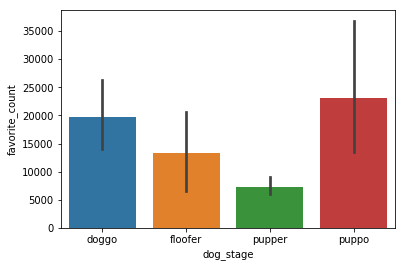

In [110]:
sns.barplot(x='dog_stage',y='favorite_count',data=df_clean).set_title('Count of favorite count for each dog stage')

[Text(0,0.5,'Number of retweets and favorites'),
 Text(0.5,0,'Rating'),
 Text(0.5,1,'The relation between ratings and number of retweets/favorites')]

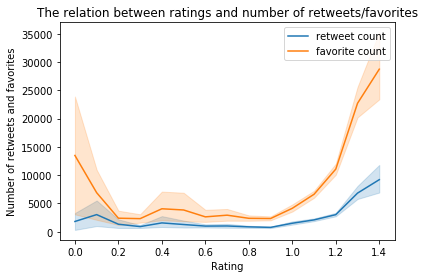

In [113]:
%matplotlib inline
ax = sns.lineplot(x="rating", y="retweet_count",label='retweet count', data=df_clean);
ax = sns.lineplot(x="rating", y="favorite_count",label="favorite count", data=df_clean);
ax.set(ylabel='Number of retweets and favorites', xlabel='Rating',title='The relation between ratings and number of retweets/favorites')

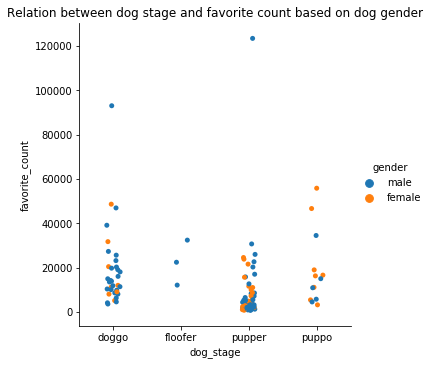

In [118]:
ax = sns.catplot(x="dog_stage", y="favorite_count", hue="gender", data=df_clean)
ax.set(title='Relation between dog stage and favorite count based on dog gender')

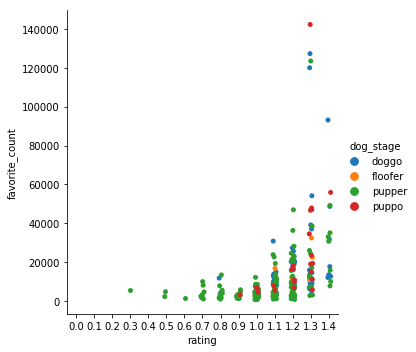

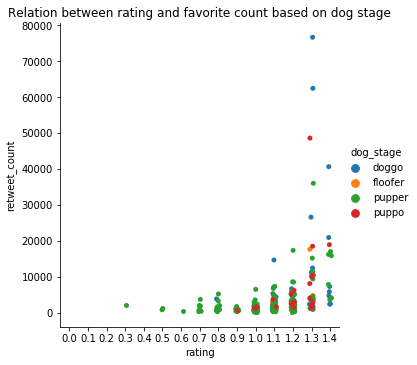

In [120]:
ax = sns.catplot(x="rating", y="favorite_count", hue="dog_stage", data=df_clean)
ax = sns.catplot(x="rating", y="retweet_count", hue="dog_stage", data=df_clean)
ax.set(title='Relation between rating and favorite count based on dog stage')

In [121]:
df_clean['favorite_count'].corr(df_clean['retweet_count'])

0.9220463807261867

Text(0.5,1,'A line plot showd the positive relation between favorite count and retweets count')

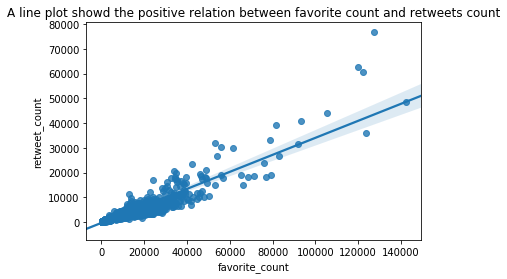

In [123]:
sns.regplot(x="favorite_count", y="retweet_count", data=df_clean).set_title('A line plot showd the positive relation between favorite count and retweets count')

In [124]:
df_clean[df_clean['dog_stage'] != 'None'].groupby('dog_stage')['rating'].mean()


dog_stage
doggo      1.188889
floofer    1.187500
pupper     1.065094
puppo      1.204348
Name: rating, dtype: float64